<a href="https://colab.research.google.com/github/tinypenguin-Bang/Machine-Deep-Learning-HW/blob/main/2021251496_%EB%B0%A9%EC%A3%BC%ED%98%95_4_2_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 라이브러리 선언 + 구글 드라이브 마운트
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import zipfile
# image 압축파일 다운로드 및 압축해제
fig_zip = '/content/drive/MyDrive/Colab Notebooks/Food.zip'
# zip파일 압축해제
with zipfile.ZipFile(fig_zip, 'r') as fig_d:
# 드라이브 내 fig폴더에 압축 해제
    fig_d.extractall('drive/MyDrive/fig')
fig_d.close()

KeyboardInterrupt: ignored

In [2]:
data_dir = '/content/drive/MyDrive/fig' # 이미지 크기 지정
img_height = 150
img_width = 150

In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory( # 학습 데이터
  data_dir+'/training',    
  image_size=(img_height, img_width))

Found 9866 files belonging to 11 classes.


In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory( # 검증 데이터
  data_dir+'/validation',    
  image_size=(img_height, img_width))

Found 3430 files belonging to 11 classes.


In [5]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(  # 테스트 데이터
  data_dir+'/evaluation',    
  image_size=(img_height, img_width))

Found 3347 files belonging to 11 classes.


In [6]:
from tensorflow.keras.applications import EfficientNetB0    # EfficientNet 가져오기
eff_model = EfficientNetB0(weights = 'imagenet',include_top=False, input_shape=(150,150,3))

In [7]:
eff_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 150, 150, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 150, 150, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 151, 151, 3)  0           ['normalization[0][0

In [8]:
class_names = train_ds.class_names  # 클래스 이름 로드
print(class_names)

['Bread', 'Dairy product', 'Dessert', 'Egg', 'Fried food', 'Meat', 'Noodles-Pasta', 'Rice', 'Seafood', 'Soup', 'Vegetable-Fruit']


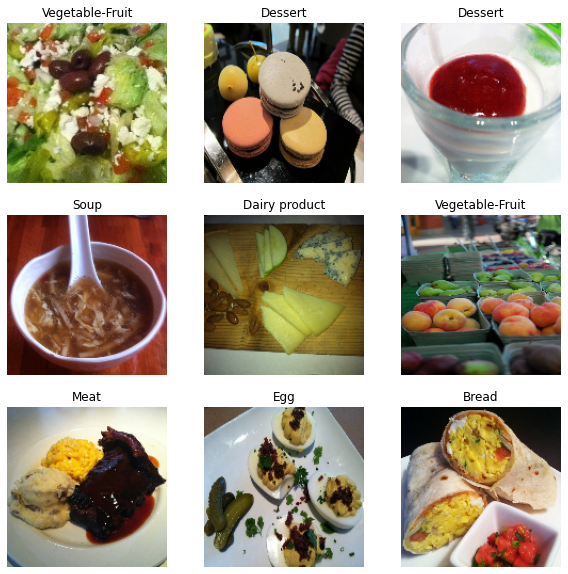

In [9]:
plt.figure(figsize=(10, 10))    # 라벨, 이미지 확인
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [10]:
eff_model.trainable = False

In [11]:
eff_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 150, 150, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 150, 150, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 151, 151, 3)  0           ['normalization[0][0

In [12]:
from tensorflow.keras import Sequential, Model, layers
tr_model = Sequential()

In [13]:
tr_model.add(eff_model)

In [14]:
tr_model.add(layers.Flatten())      # Classification을 위한 레이어 추가
tr_model.add(layers.Dense(256,activation='relu'))
tr_model.add(layers.Dropout(0.5))
tr_model.add(layers.Dense(11,activation='softmax'))

tr_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 5, 5, 1280)       4049571   
                                                                 
 flatten (Flatten)           (None, 32000)             0         
                                                                 
 dense (Dense)               (None, 256)               8192256   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 11)                2827      
                                                                 
Total params: 12,244,654
Trainable params: 8,195,083
Non-trainable params: 4,049,571
_________________________________________________________________


In [15]:
tr_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [16]:
# 과도학습 방지용 callback 추가
checkpoint_path = '/tmp/checkpoint/models'
checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_best_only=True)

In [17]:
# train dataset을 널어주면 배치단위로 데이터가 넘어가면서 학습
history = tr_model.fit(
  train_ds,  
  validation_data=val_ds,
  epochs=10,
  callbacks = checkpoint
)

Epoch 1/10
309/309 [==============================] - 2561s 8s/step - loss: 1.2729 - acc: 0.6441 - val_loss: 0.7360 - val_acc: 0.7758
Epoch 2/10
309/309 [==============================] - 102s 327ms/step - loss: 0.7608 - acc: 0.7626 - val_loss: 0.6667 - val_acc: 0.7994
Epoch 3/10
309/309 [==============================] - 100s 319ms/step - loss: 0.6164 - acc: 0.8083 - val_loss: 0.6529 - val_acc: 0.8073
Epoch 4/10
309/309 [==============================] - 54s 170ms/step - loss: 0.4785 - acc: 0.8467 - val_loss: 0.6795 - val_acc: 0.8227
Epoch 5/10
309/309 [==============================] - 56s 179ms/step - loss: 0.4201 - acc: 0.8608 - val_loss: 0.7031 - val_acc: 0.8178
Epoch 6/10
309/309 [==============================] - 60s 190ms/step - loss: 0.4037 - acc: 0.8710 - val_loss: 0.7422 - val_acc: 0.8213
Epoch 7/10
309/309 [==============================] - 56s 177ms/step - loss: 0.3766 - acc: 0.8828 - val_loss: 0.7443 - val_acc: 0.8213
Epoch 8/10
309/309 [==============================] - 

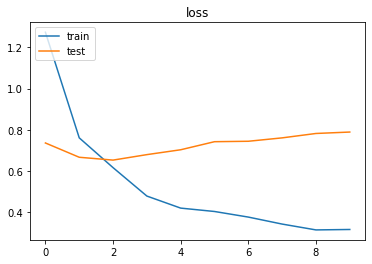

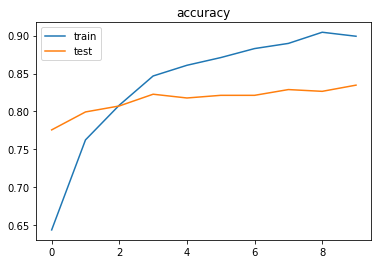

In [19]:
  # epoch별 손실, 정확도 확인
  plt.figure()
  plt.title('loss')
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  plt.figure()
  plt.title('accuracy')
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.legend(['train', 'test'], loc='upper left')

In [24]:
tr_model.metrics_names

['loss', 'acc']

In [26]:
# 모델 저장하기
tr_model.save(data_dir+'Food_EfficientNet_tl.h5')

In [27]:
# 함수 설정으로 모델의 이미지 결과 예측 및 분류 성능 검증
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

def preprocessing(file, width = 150, height = 150):
  img = cv2.imread(file)
  img = cv2.resize(img, dsize=(width, height))
  cv2_imshow(img)
  imgs = np.expand_dims(img, 0)
  return imgs

def predict_food(imgs, class_label):
  pred = tr_model.predict(imgs)
  res = np.argmax(pred)
  return class_label[res]

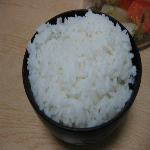

'Rice'

In [28]:
file = '/content/drive/MyDrive/fig/evaluation/Rice/0.jpg'
predict_food(preprocessing(file), class_names)

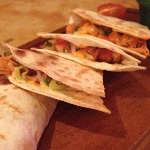

'Bread'

In [33]:
file = '/content/drive/MyDrive/fig/evaluation/Bread/110.jpg'
predict_food(preprocessing(file), class_names)

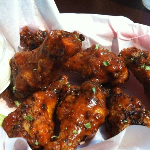

'Meat'

In [36]:
file = '/content/drive/MyDrive/fig/evaluation/Meat/111.jpg'
predict_food(preprocessing(file), class_names)

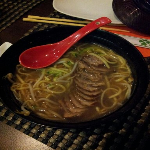

'Noodles-Pasta'

In [37]:
file = '/content/drive/MyDrive/fig/evaluation/Noodles-Pasta/105.jpg'
predict_food(preprocessing(file), class_names)